# GA 2.8: [Ice Ice Baby](https://www.youtube.com/watch?v=rog8ou-ZepE), Part 2

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.8, January 17, 2025.*

In this notebook we will introduce a method for predicting the amount of profit that is possible for a given set of tickets selected, and set up a Monte Carlo Simulation to evaluate the distribution.

Profit, $B$, can be evaluated as follows _given that one of our $N_t$ tickets is the winning ticket_:

$$
B = \frac{W}{N_{w}} - 3N_t
$$

where:
- $B$ is profit (or benefit; we use $B$ to avoid confusion with $P$), in USD
- $W$ is the total payout, in USD
- $N_{w}$ is the number of winning tickets purchased (by other participants) for the winning minute, $m_w$
- $N_t$ is the number of tickets we purchase
- 3 is the cost per ticket (in USD)

Note in particular that the **number of (potential) winning tickets purchased by participants** has a big impact on the winnings. It also varies (quite significantly!) by minute, which can be denoted as $N_{w}(m)$, where $m$ is the minute. We don't have the time to go into the details here, but suffice to say that the distribution of $N_{w}(m)$ very much follows the historic average of the breakup day and minute (i.e., minutes in late april in the early after noon are _very_ popular), but also, various minutes throughout the day also vary significantly in popularity (e.g., minutes ending in 0 are much more popular than those ending in 2).

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Besides the expected value calculation in Task 2, this notebook is mostly useful for evaluating the distribution of a set of tickets.</p></div>

In [4]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from tools import *

pickle_path = os.path.join('pickles',
                           'tickets_per_minute.pkl')
with open(pickle_path, 'rb') as f:
    loaded_radial_dist_list = pickle.load(f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Number of Tickets per Minute

The cell below provides code to generate a histogram of the number of tickets purchased per minute. There is a different distribution defined for each minute of the day.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.1:</b>   

Run the cell below and change the day and minute to see how the number of tickets varies per day. Try at least one minute in near the mode of the historic average breakup and one in the "unlikely" zone.

</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>

Note that we loaded a pickle file in the cell above that provides a distribution for $N_w(m)$.
</p>
</div>

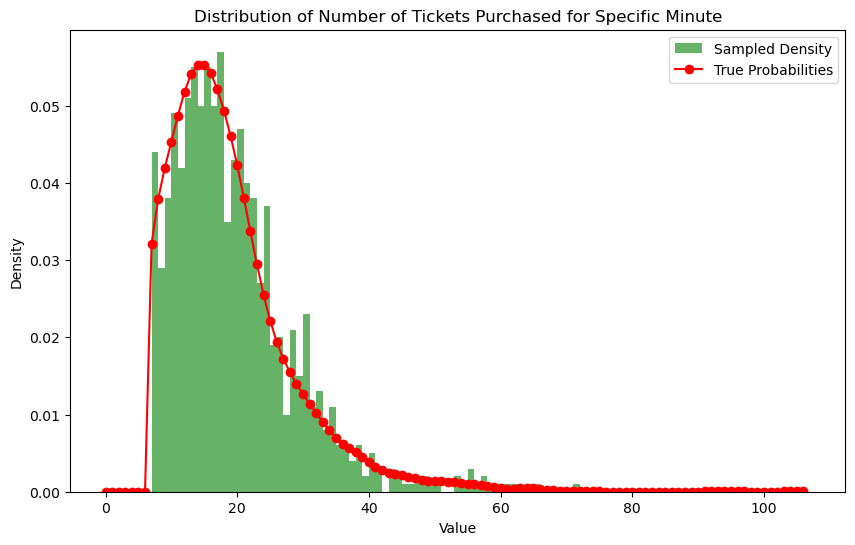

In [10]:
def plot_sample_distribution(sample, probabilities):
    plt.figure(figsize=(10, 6))
    plt.hist(sample, bins=np.arange(len(probabilities) + 1), density=True, alpha=0.6, color='g', label='Sampled Density')

    # Verification plot
    plt.plot(np.arange(len(probabilities)), probabilities, 'ro-', label='True Probabilities')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Distribution of Number of Tickets Purchased for Specific Minute')
    plt.legend()
    plt.show()

trial_day = 23
trial_min_in_day = 13*60 + 30
trial_min = trial_day*24*60 + trial_min_in_day

probabilities = loaded_radial_dist_list[trial_min]
sample_size = 1000
sample = sample_integer(probabilities, sample_size)

plot_sample_distribution(sample, probabilities)


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.2:</b>   

In the cell above, try changing the selected minute to be near the mode of the historic average breakup and one in the "unlikely" zone.

</p>
</div>

## Part 2: Expected Value of Profit

Before running a Monte Carlo Simulation, let's get an idea for what we should expect using an expected value calculation. Using the equation provided at the beginning of the notebook, combined with the example code from the first notebook, you should be able to evaluate this for any combination of tickets.

Recall that the expectation of discrete events (such as winning tickets) is given by:

$$
E[X] = \sum_{i=1}^{N} x_i p_i
$$


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.1:</b>   

Compute the expected value of winning with the minute April 20 at 14:15.

Assume the payout is $300000 and the ticket cost is $3.

</p>
</div>

In [19]:
trial_day = YOUR_CODE_HERE
trial_min_in_day = YOUR_CODE_HERE
trial_min = YOUR_CODE_HERE

probabilities = loaded_radial_dist_list[trial_min]
sample_size = 1000
sample = sample_integer(probabilities, sample_size)
expected_value_N_w = int(round(np.mean(sample)))

m = Models()
p_ticket = m.get_p([trial_min])

expected_value_profit = YOUR_CODE_HERE

print(f"The expected number of tickets purchased is {expected_value_N_w}")
print(f"The expected profit is {expected_value_profit:.2f} USD")

# SOLUTION
trial_day = 20
trial_min_in_day = 14*60 + 15
trial_min = trial_day*24*60 + trial_min_in_day

probabilities = loaded_radial_dist_list[trial_min]
sample_size = 1000
sample = sample_integer(probabilities, sample_size)
expected_value_N_w = int(round(np.mean(sample)))

m = Models()
p_ticket = m.get_p([trial_min])

expected_value_profit = p_ticket*300000/expected_value_N_w - 3

print(f"The expected number of tickets purchased is {expected_value_N_w}")
print(f"The expected profit is {expected_value_profit:.2f} USD")

The expected number of tickets purchased is 15
The expected profit is -2.59 USD


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2.2:</b>   

Based on the result above, should you make the bet?

</p>
</div>

_Your answer here._

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

Technically, no, because you expect to make a profit. However, most of us probably would make the bet, as $3 is a small amount, and there is still the chance that you could win big! 
</p>
</div>

## Part 3: Monte Carlo Simulation

Now the fun part! Rather than looking at a single point estimate of the profit, let's consider the whole _distribution._

The steps of the algorithm are:
1. Select tickets
2. Determine the number of winning tickets for each minute (defined by the tickets and the distributions from our pickle file)
3. Calculate the _winnings_
4. Calculate the _profit_
5. Evaluate the distributions

Note that in this case, the _winnings_ is just the first part of the profit equation above (without the ticket cost):

$$
\textrm{winnings } = \frac{W}{N_{w}}
$$

First we provide a function to help with plotting the results. You will probably want to modify this function later, or make your own, to better suit your needs in later parts of this GA.


In [68]:
def plot_hist_and_cdf(sampled_profit, xlim=None, ylim=None):
    fig, ax1 = plt.subplots()

    # Plot histogram
    ax1.hist(sampled_profit, bins=50, edgecolor='k', density=True, alpha=0.6, label='Histogram')
    ax1.set_xlabel('Winnings, thousands of USD')
    ax1.set_ylabel('Density')
    ax1.legend(loc='upper left')

    # Create a second y-axis for the cumulative distribution
    ax2 = ax1.twinx()
    sorted_samples = np.sort(sampled_profit)
    cdf = np.arange(1, len(sorted_samples) + 1) / (len(sorted_samples) + 1)
    ax2.plot(sorted_samples, cdf, color='red', label='CDF')
    ax2.set_ylabel('Cumulative Probability')
    ax2.legend(loc='upper right')

    # plt.title('Histogram and Cumulative Distribution of Sample Benefits')
    plt.show()

    # Plot exceedance probability
    fig, ax = plt.subplots()
    exceedance_prob = 1 - cdf
    ax.plot(sorted_samples, exceedance_prob, color='blue', label='Exceedance Probability')
    ax.vlines(300, 0, 1, color='grey', linestyle='--', label='300k threshold')
    ax.set_xlabel('Winnings, thousands of USD')
    ax.set_ylabel('Exceedance Probability')
    ax.set_xscale('log')
    ax.set_yscale('log')
    if xlim is not None:
        ax.set_xlim(*xlim)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.legend(loc='upper right')
    plt.show()


We begin with an arbitrary set of tickets to illustrate the MCS process.

Name: no name
Reference: April 1
Days: 60
Number of tickets: 1440
Cost for all tickets: 4320.0



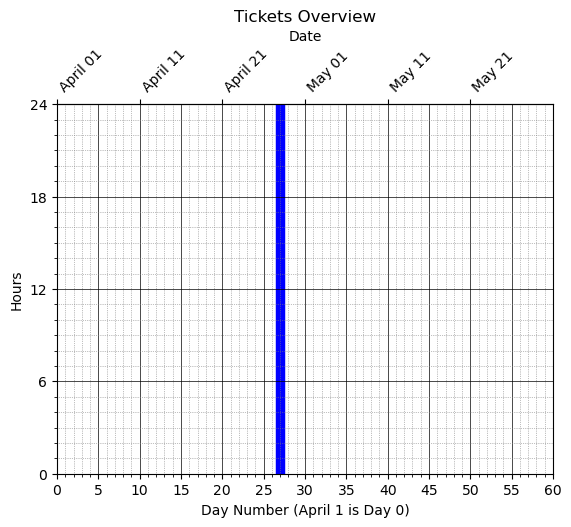

In [46]:
t = Tickets()
t.add([[27]])
# t.add([[27, 28, 29]])
# t.add([[14], [13]])
t.status()
t.show()

The probability of any ticket winning is 3.718e-02
Number of tickets: 	1440
Cost tickets: 		 4.32e+00 kUSD 	( 4320 USD)
Expected winnings: 	 8.82e-01 kUSD 	(  882 USD)
Expected profit: 	-3.44e+00 kUSD 	(-3438 USD)


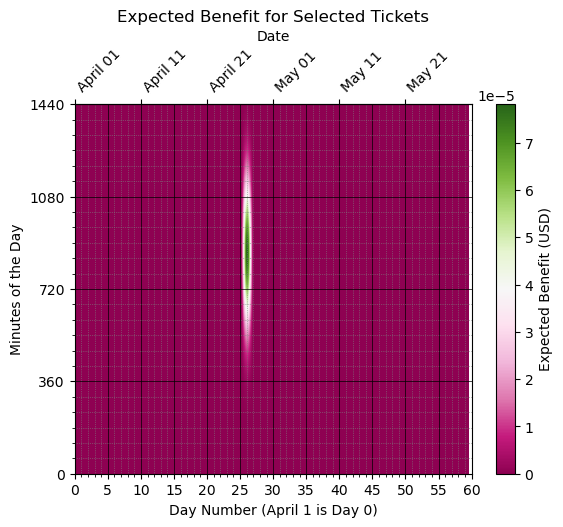

In [47]:
m = Models()

prob_T = np.zeros((len(t.tickets)))
Nw_T = np.zeros((len(t.tickets)))

for i, ti in enumerate(t.tickets):
    prob_T[i] = m.get_p([ti])
    day, min = Minutes.get_day_min(ti)
    Nw_T [i] = m.ticket_model(day, min)

prob_T_matrix = m.map_data_to_day_min(prob_T, t.tickets)
prob_all = np.sum(prob_T)

print(f"The probability of any ticket winning is {prob_all:.3e}")
cost_tickets = len(t.tickets)*3
expected_winnings = np.sum(300*prob_T/(Nw_T + 1))
expected_profit = expected_winnings - .003*len(t.tickets)
print(f"Number of tickets: \t{len(t.tickets)}")
print(f"Cost tickets: \t\t{cost_tickets/1000:9.2e} kUSD \t({len(t.tickets)*3:5.0f} USD)")
print(f"Expected winnings: \t{expected_winnings:9.2e} kUSD \t({expected_winnings*1000:5.0f} USD)")
print(f"Expected profit: \t{expected_profit:9.2e} kUSD \t({expected_profit*1000:5.0f} USD)")

m.plot(prob_T_matrix)

Now we implement the MCS.

In [48]:
Ns = 100000
sampled_ticket = np.zeros((Ns,), dtype=int)
sampled_probability = np.zeros((Ns,))
sampled_winnings = np.zeros((Ns,))
for i in range(Ns):
    sampled_ticket[i] = random.choices(t.tickets, weights=prob_T, k=1)[0]
    sampled_probability[i] = prob_T[
        t.tickets.index(sampled_ticket[i])]
    sampled_winnings[i] = 300/(1 + sample_integer(
        loaded_radial_dist_list[sampled_ticket[i]]))

And use the plotting function.

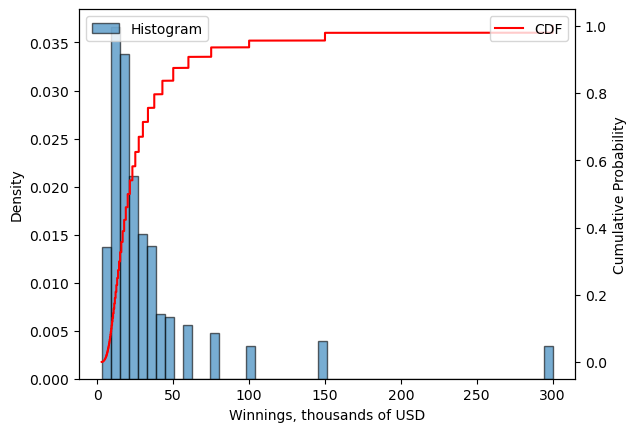

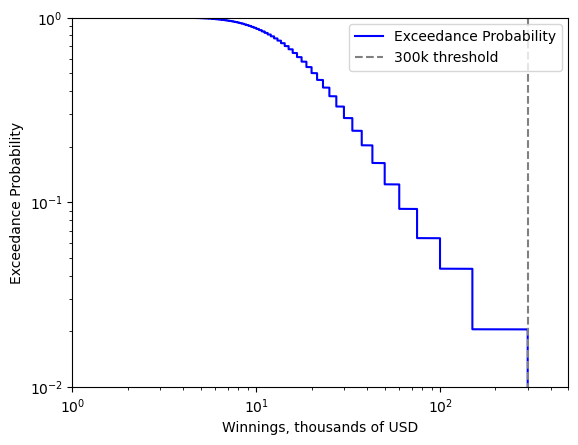

In [69]:
plot_hist_and_cdf(sampled_winnings,
                  xlim=(1,500), ylim=(1e-2, 1))

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>We plot winnings because they are always positive and thus easier to visualize on the log-log scale.</p></div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p><b>Note</b> that the analysis above has been done by calculating the winnings after sampling the number of other winners who chose each of the tickets we selected. This produces a distribution that is _conditional_ on one of the tickets selected being a winning ticket. This is why the probabilities in the plots seem high compared to the results found in the first notebook. The following analyses apply the probability of each ticket being a winning ticket, to properly account for this.</p></div>

And finally, a few summary statistics to help you interpret the results.

In [73]:
print("=====================================")
print("    USING EXPECTED VALUE CALC    ")
print("=====================================")
print(f"Number of tickets: \t{len(t.tickets)}")
print(f"Cost tickets: \t\t{cost_tickets/1000:9.2e} kUSD \t({len(t.tickets)*3:5.0f} USD)")
print(f"Expected winnings: \t{expected_winnings:9.2e} kUSD \t({expected_winnings*1000:5.0f} USD)")
print(f"Expected profit: \t{expected_profit:9.2e} kUSD \t({expected_profit*1000:5.0f} USD)")


    USING EXPECTED VALUE CALC    
Number of tickets: 	1440
Cost tickets: 		 4.32e+00 kUSD 	( 4320 USD)
Expected winnings: 	 8.82e-01 kUSD 	(  882 USD)
Expected profit: 	-3.44e+00 kUSD 	(-3438 USD)


And finally, a plot of the distribution of winnings.

**End of notebook.**

<div style="margin-top: 50px; padding-top: 20px; border-top: 1px solid #ccc;">
  <div style="display: flex; justify-content: flex-end; gap: 20px; align-items: center;">
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="width:100px; height:auto;" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="width:88px; height:auto;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
  </div>
  <div style="font-size: 75%; margin-top: 10px; text-align: right;">
    &copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. 
    This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.
  </div>
</div>


<!--tested with WS_2_8_solution.ipynb-->